# 주성분 분석(PCA: Principal Component Analysis)
- 다차원의 데이터를 소차원의 데이터로 환원시키는 기법

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np

fruits = np.load('../Data/fruits.npy')
fruits.shape

(300, 100, 100)

In [3]:
# 2차원 배열로 변경하기
fruits_2d = fruits. reshape(-1, 100*100)
fruits_2d.shape

(300, 10000)

In [4]:
# PCA 모델 구성하기
from sklearn.decomposition import PCA

pca = PCA(n_components=50) # 300개의 데이터 중 구별이 확실한 주성분 50개 선택 (Feature들 중 특징을 포함하여 구성)
# 구별이 확실한 샘플을 선택하는 게아니라 다른 샘플이라도 각 컬럼의 데이터들을 선택
pca.fit(fruits_2d)


PCA(n_components=50)

In [5]:
# 축소된 차원 크기 확인하기
pca.components_.shape

(50, 10000)

In [6]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr) # n은 샘플 갯수
    # 한 줄에 10개씩 이미지를 그리기, 샘플갯수를 10으로 나누어 전체 행 갯수를 계산
    rows = int(np.ceil(n/10)) # 올림처리
    # 행이 1개이면 열 갯수가 샘플 갯수이고 그렇지 않으면 10개
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows,cols, figsize= (cols*ratio,rows*ratio),squeeze=False )# 여러행일때만 튜플 반환이라 1행일 떄는 1개만 반환되어 오류가 나는데 그 때 쓰는 것이 squeeze = False

    for i in range(rows):
        for j in range(cols):
            if i*10 + j <n : # n개 까지만 그린다.
                axs[i,j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

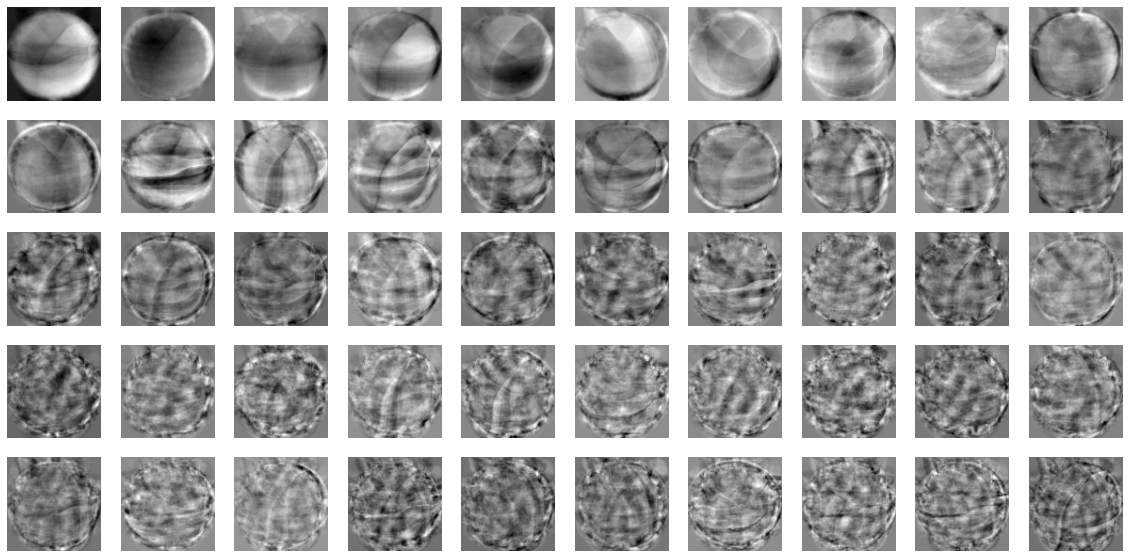

In [8]:
draw_fruits(pca.components_.reshape(-1,100,100),2)

In [9]:
# 행의 갯수는 원본과 동일하게 하고 Feature의 특성을 50개의 주성분으로 변경하기

In [11]:
# 행의 갯수는 원본과 동일하게 하고 Feature의 특성을 50개의 주성분으로 변경하기
print(fruits_2d.shape) # 원본 크기 
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


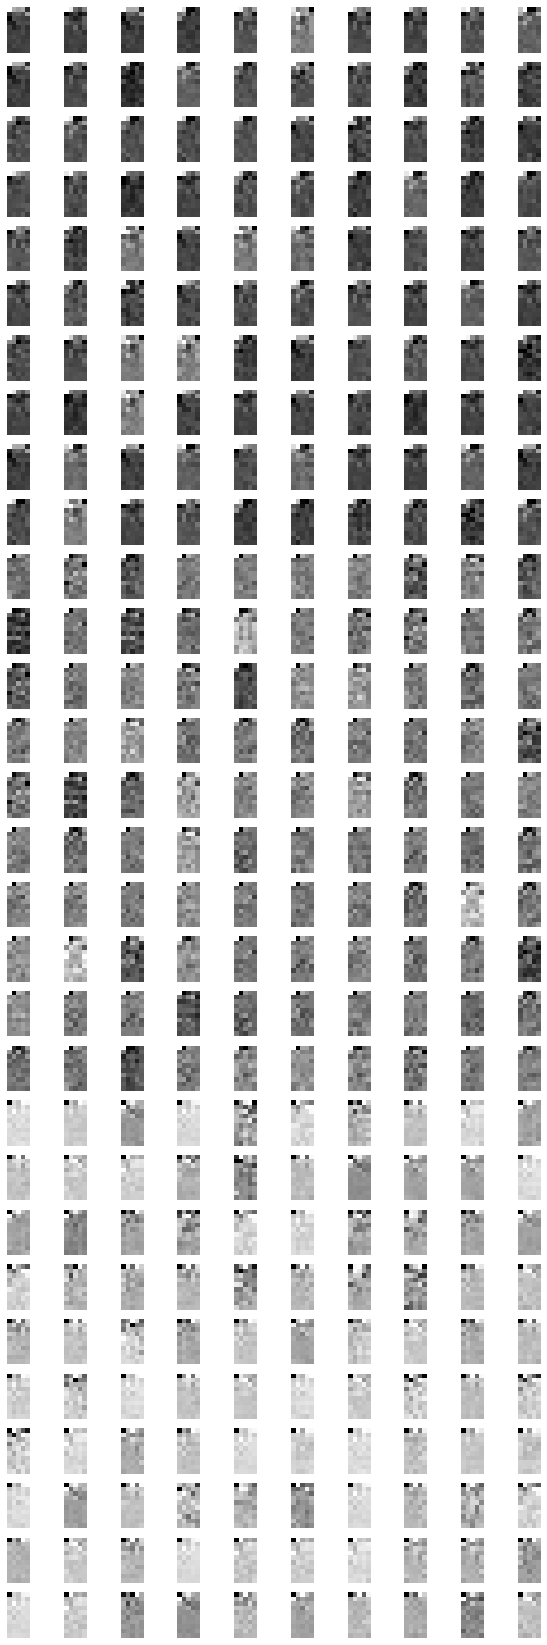

In [12]:
draw_fruits(fruits_pca.reshape(-1,10,5)) # 50을 10*5 로 한거는 그냥 임의로 한거임 25*2 도 됨

---
### 원본 데이터 재구성

In [13]:
fruits_inverse = pca.inverse_transform(fruits_pca)

In [16]:
# 그림을 그리기 위해 2차원 확장
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
fruits_reconstruct.shape

(300, 100, 100)

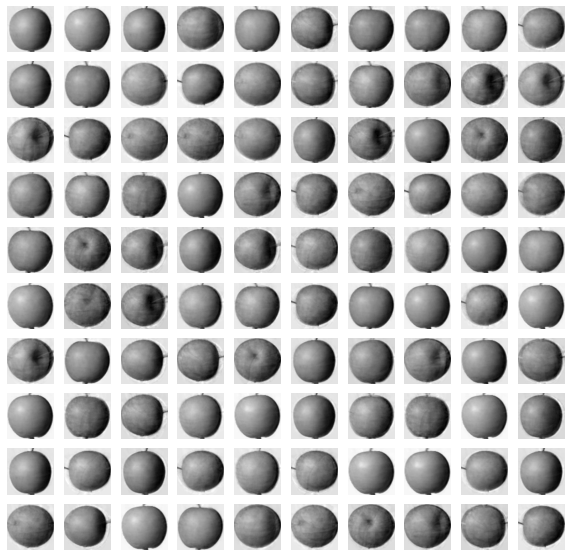

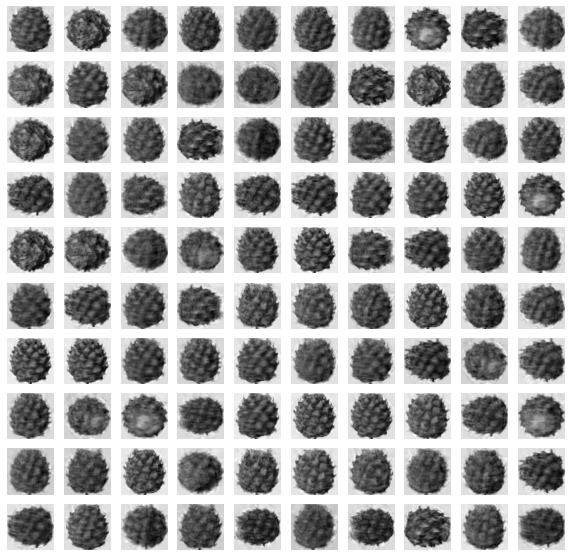

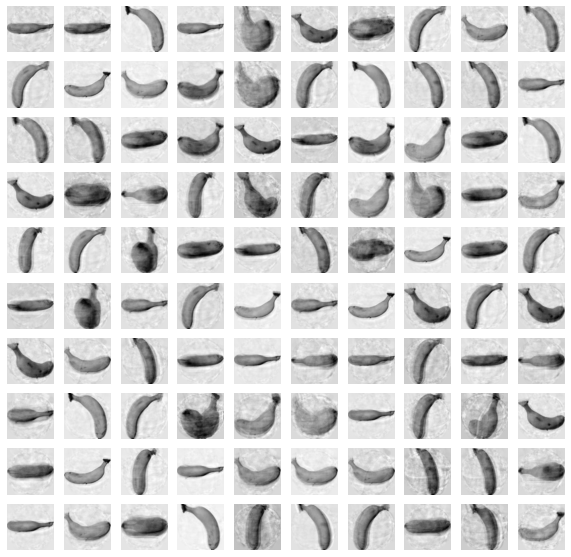

In [17]:
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n')

> 1 / 200의 데이터 특성만 가지고도 전반적으로 배경은 꺢ㅅ하지 않으나 물체의 구분은 가능하다.

---
# 설명된 분산
: 주성분으로 구성할 떄 원본 데이터의 분산을 어느 정도 유지하고 있었는지 확인하는 방법(이미지의 분산은 이미지 크기)

In [19]:
np.sum(pca.explained_variance_ratio_) # 50개의 주성분 데이터

0.9223024172938785

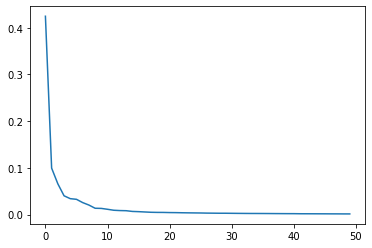

In [21]:
# 그래프 그리기
plt.plot(pca.explained_variance_ratio_)
plt.show()

> 10개 정도만 주성분을 잡아도 문제 없을 것 같아 보인다. 

----
# 주성분을 10개만 정의해서 해보자

In [24]:
pca10 = PCA(n_components=10)
fruits_pca10 = pca10.fit_transform(fruits_2d)
inverse_pca10 = pca10.inverse_transform(fruits_pca10)

In [25]:
fruits_pca10.shape

(300, 10)

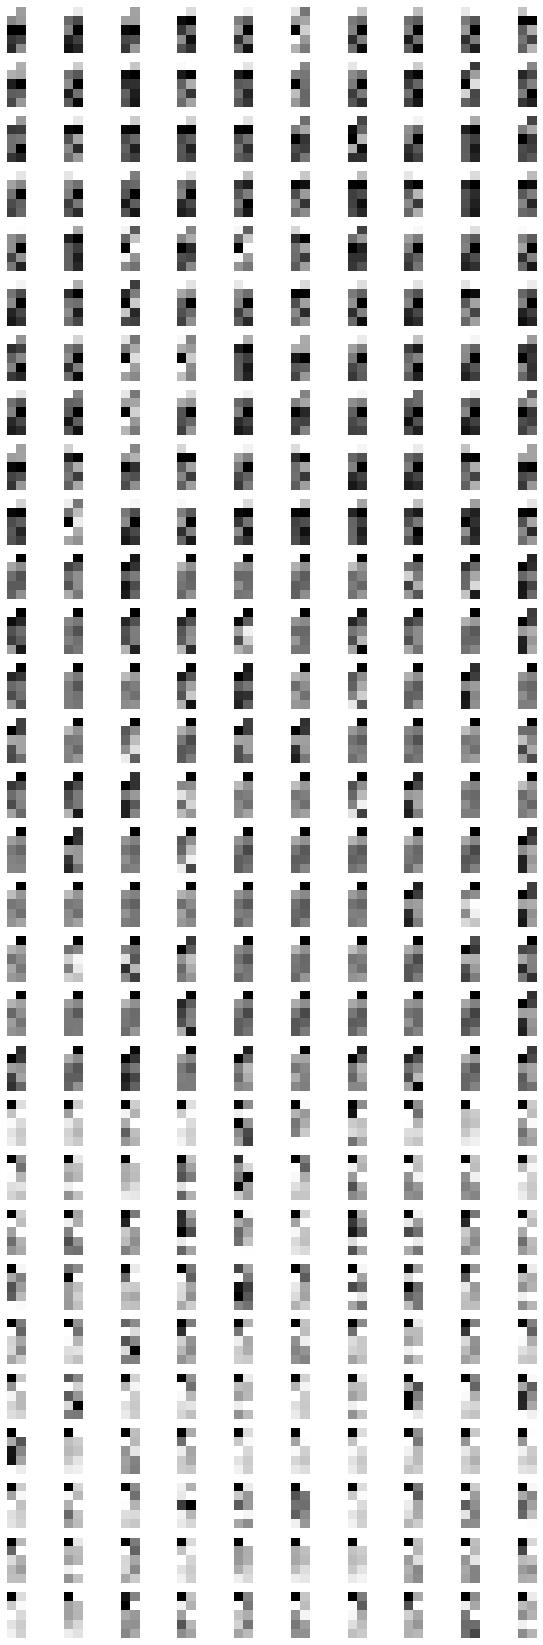

In [27]:
draw_fruits(fruits_pca10.reshape(-1,5,2))

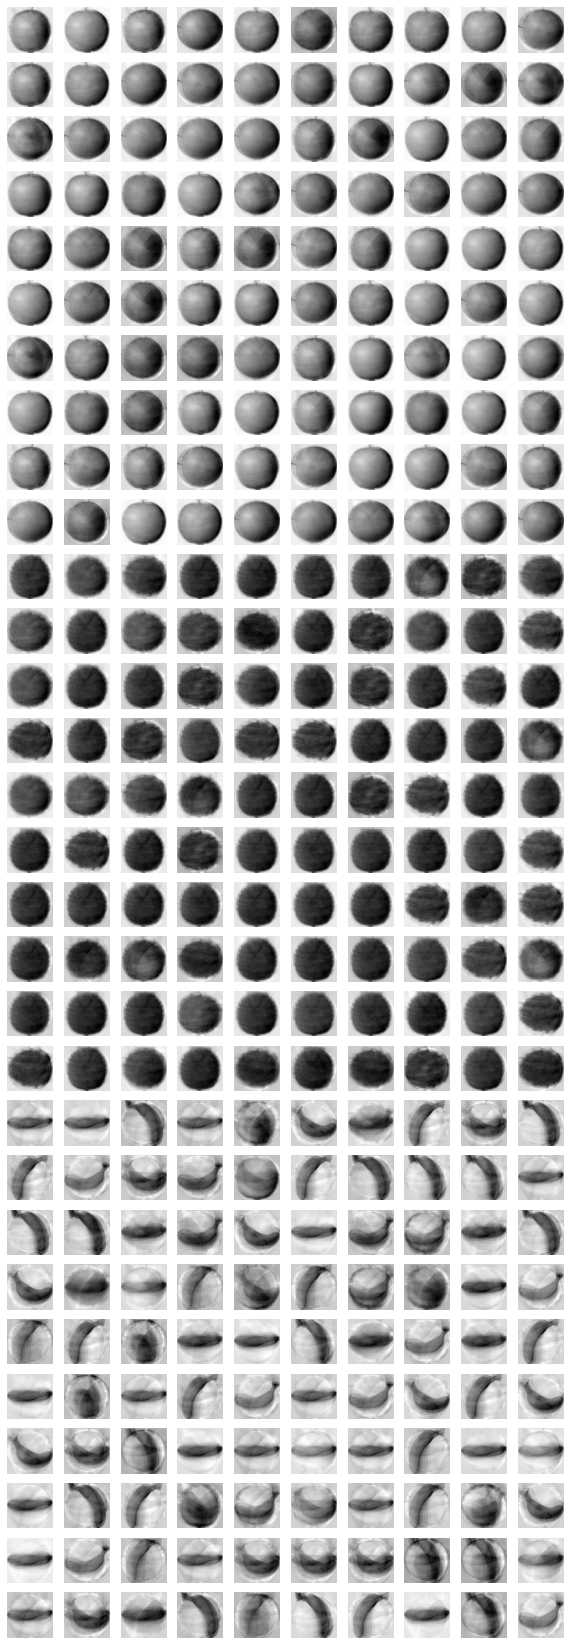

In [28]:
draw_fruits(inverse_pca10.reshape(-1,100,100))

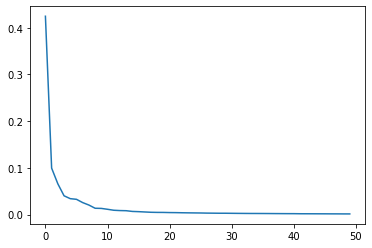

In [29]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

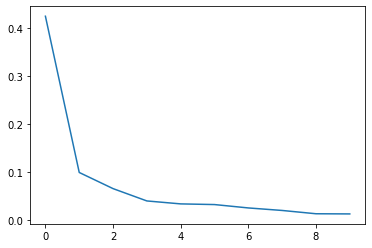

In [30]:
plt.plot(pca10.explained_variance_ratio_)
plt.show()

----
# 로지스틱 회귀분석에 주성분 분석을 대입하여 사용해보기

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [33]:
# 로지스틱 회귀분석은 지도학습이므로 Target이 피룡하다.
target = np.array([0]*100 +[1] * 100+ [2] * 100)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
# 교차검증을 실시
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.4658200263977051


> 정확도는 99.7% 정도 이며, 계산에 필요한 시간은 0.5초 정도 나왔다.

In [42]:
# 300 * 50 로 구성된 주성분 분석으로 구성된 데이터로 확인
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))


1.0
0.0407562255859375



> 정확도는 100%정도이며 계산에 필요한 시간은 0.04초 이다.

In [46]:
scores

{'fit_time': array([0.05011415, 0.03997898, 0.02810073, 0.05034614, 0.03524113]),
 'score_time': array([0.00030088, 0.00036883, 0.0003202 , 0.00029492, 0.00038981]),
 'test_score': array([1., 1., 1., 1., 1.])}

----
# 주성분 분석의 분산의 크기를 정해 사용하기

In [50]:
pca = PCA(n_components= 0.5) # n_components를 실수를 정하면 분산의 percentage 정도로 나타낸다
pca.fit(fruits_2d)


PCA(n_components=0.5)

In [52]:
print(pca.n_components_) # feature가 2개만 있으면 50% 를 맞출 수 있다.

2


> 필요한 주성분 Feature을 2개로 사용  
> 주성분 2개면 그래프로 표현이 가능하다.

In [53]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca)

[[-2776.49847121 -1580.32248595]
 [-3075.90968429 -2734.47672804]
 [-2616.82897685 -1496.47729054]
 [-3113.62557784 -2527.08054346]
 [-2519.26713274 -2323.85401839]
 [-1554.21207028   111.21589729]
 [-2710.66495629 -1854.21438884]
 [-2880.82247081 -1830.73352912]
 [-2305.42101135 -2656.80048986]
 [-1521.70480708 -2438.74105638]
 [-2486.37057672 -1485.65311424]
 [-2802.39718457 -1994.57065133]
 [-2807.16568878 -2027.60866786]
 [-2207.92429888 -2296.98948497]
 [-2917.49963475 -2430.17164034]
 [-2198.50180773  -641.63437481]
 [-2311.69381816 -2699.06845888]
 [-3286.7416605  -2428.50066323]
 [-2639.40059149   492.96037029]
 [-3560.72181529 -1285.04607091]
 [-3704.40016679 -1566.90088202]
 [-2422.98407888 -2077.37748918]
 [-3166.56151741 -2231.62345598]
 [-3055.09827091 -2241.76527848]
 [-2743.18912497 -2270.65507093]
 [-3178.29574528  -965.55426379]
 [-2965.92933022  -251.45630701]
 [-2783.70803832 -2597.78291028]
 [-3498.66774098 -1931.01944139]
 [-3257.81981998  -274.68039207]
 [-2622.12

In [55]:
# 교차 검증으로 확인
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.04280457496643066


> 정확도는 99.3% 이며 계산 시간은 0.04초 이다.

In [57]:
# 주성분의 값을 알아보자
pcaComponents = pca.fit_transform(fruits_2d)
pcaComponents
# 데이터 프레임 구성
import pandas as pd
pcaDf = pd.DataFrame(data=pcaComponents, columns=['PCA1','PCA2'])
pcaDf

,PCA1,PCA2
0,-2776.498471,-1580.322486
1,-3075.909684,-2734.476728
2,-2616.828977,-1496.477291
3,-3113.625578,-2527.080543
4,-2519.267133,-2323.854018
...,...,...
295,4949.597581,-1150.077329
296,5737.256528,1937.563811
297,5183.595806,119.008683
298,3986.738651,-72.858999


---
# 산포도로 확인하기

In [61]:
for label in range(0,3):
    data = fruits_pca[label]

data

array([-2616.82897685, -1496.47729054])

---
# k-Means에 주성분 분석 적용해 보기

In [62]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [63]:
# 군집 갯수와 빈도수 확인하기
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

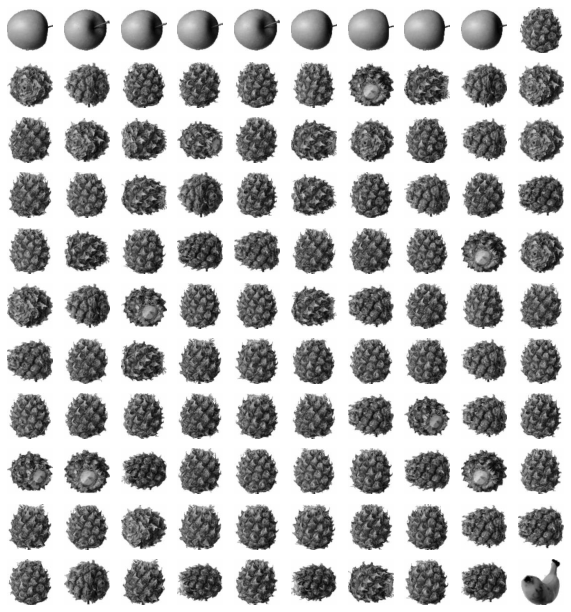

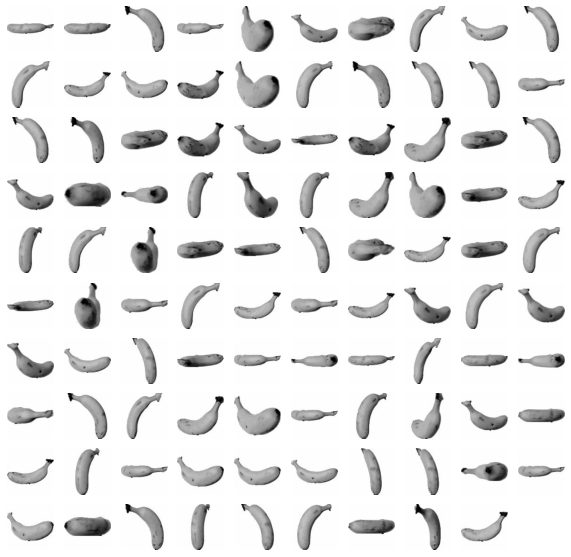

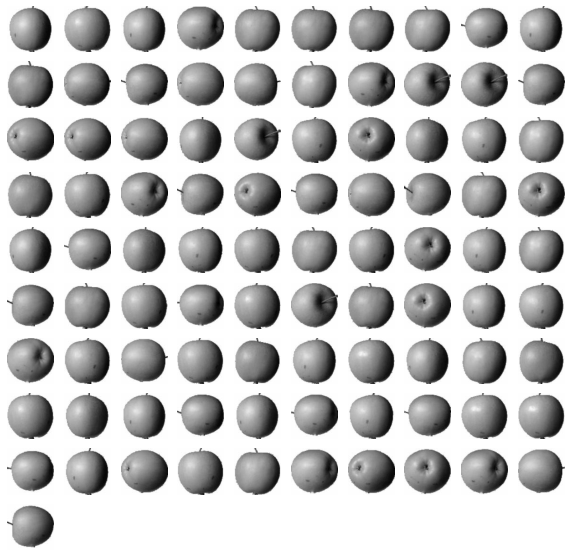

In [64]:
# 그림으로 확인하기
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

---
# 산포도로 확인해 보기

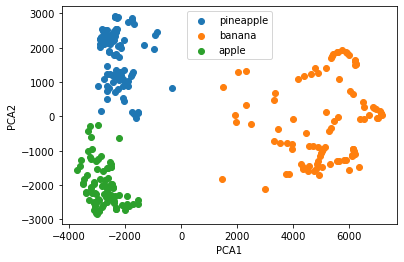

In [68]:
for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple','banana','apple'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()